## Análise da série de Magnetosheath

In [1]:
# Iniciando com a rotina criada para ler o arquivo e converter para dataframe:
%run ../rotinas/convert_extension_Dframe.py

In [2]:
# importando bibliotecas adicionais
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lombscargle packages
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast

In [3]:
# lendo o arquivo desejado:
filename = 'magnetosheath5s.DAT'
df = convertDframe(filename)
df.columns = ['Time','Br','Bt','Bn','Bo']
df.head()

,Time,Br,Bt,Bn,Bo
1,28.50000,-0.68124,0.78624,-0.15024,1.05105
2,28.50006,-0.69602,0.80322,-0.15122,1.07284
3,28.50012,-0.70360,0.80800,-0.14519,1.08072
4,28.50017,-0.70819,0.81548,-0.14129,1.08995
5,28.50023,-0.71729,0.83210,-0.14806,1.10886


In [4]:
df.describe()

,Time,Br,Bt,Bn,Bo
count,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000
mean,28.875000,-0.525474,0.607320,-0.215739,0.850732
std,0.216531,0.120193,0.151433,0.124073,0.143727
min,28.500000,-0.942610,0.220370,-0.585400,0.411640
25%,28.687500,-0.610460,0.499990,-0.297040,0.750010
50%,28.875000,-0.528320,0.611020,-0.212800,0.840370
75%,29.062500,-0.445240,0.705170,-0.138940,0.955740
max,29.250000,-0.095470,1.347180,0.369130,1.391910


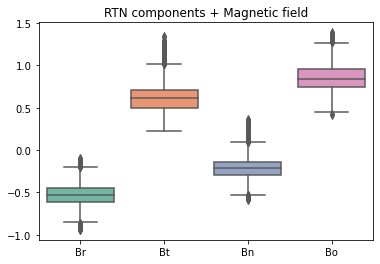

In [5]:
fig1, ax1 = plt.subplots()
ax1.set_title('RTN components + Magnetic field')
df.drop(['Time'], axis = 1, inplace = True)
ax1 = sns.boxplot(data=df, orient = 'v', palette = 'Set2')

<AxesSubplot:>

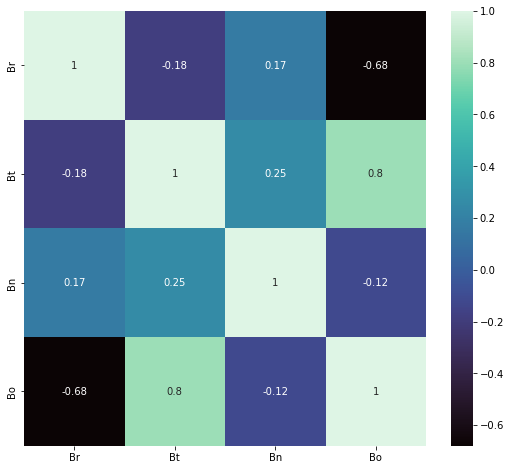

In [6]:
# HeatMap
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(matrix, cmap='mako', annot=True)

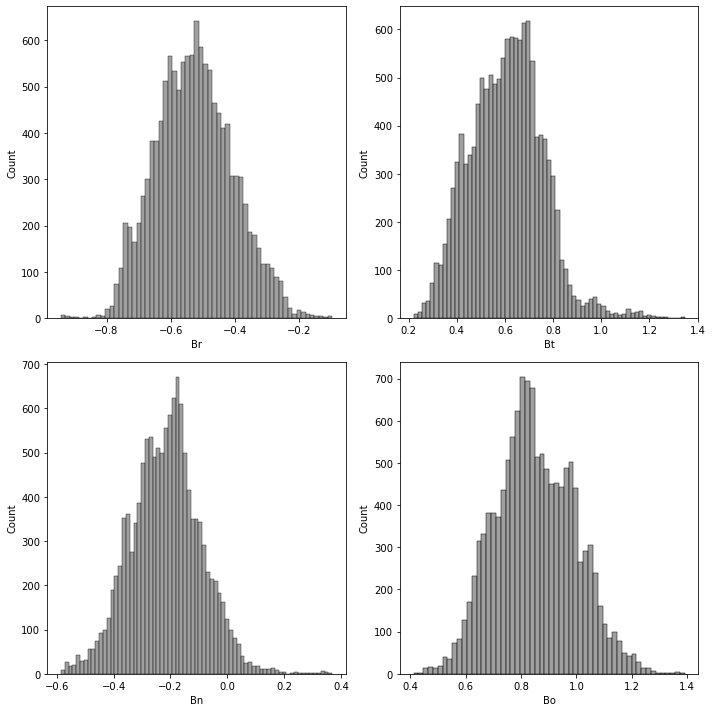

In [7]:
# Distribution
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize=(10,10))
for i in mag:
    plt.subplot(a, b, c)
    sns.histplot(i, color='grey')
    plt.tight_layout()
    c = c + 1
plt.show()

## Lomb-Scargle Periodogram

In [8]:
# lendo o arquivo desejado:
filename = 'magnetosheath5s.DAT'
df = convertDframe(filename)
df.columns = ['Time','Br','Bt','Bn','Bo']
df.head()

,Time,Br,Bt,Bn,Bo
1,28.50000,-0.68124,0.78624,-0.15024,1.05105
2,28.50006,-0.69602,0.80322,-0.15122,1.07284
3,28.50012,-0.70360,0.80800,-0.14519,1.08072
4,28.50017,-0.70819,0.81548,-0.14129,1.08995
5,28.50023,-0.71729,0.83210,-0.14806,1.10886


In [9]:
t = df['Time']%1
t = t*24
t.values

array([12.     , 12.00144, 12.00288, ...,  5.99712,  5.99856,  6.     ])

In [10]:
tmin = t.values[0]
tmax = t.values[-1]
print(tmin)
print(tmax)

12.0
6.0


Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 12
 - Computing periods at 11 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [11.14201348 11.14201348 11.14201348 11.14201348 11.14201348]
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 12
 - Computing periods at 11 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [ 5.9140635  13.33342223 13.33342223 13.33342223 13.33342223]
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 12
 - Computing periods at 11 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [ 7.19838746 11.374372   11.374372   11.374372   11.374372  ]
Finding optimal frequency:
 - Estimat

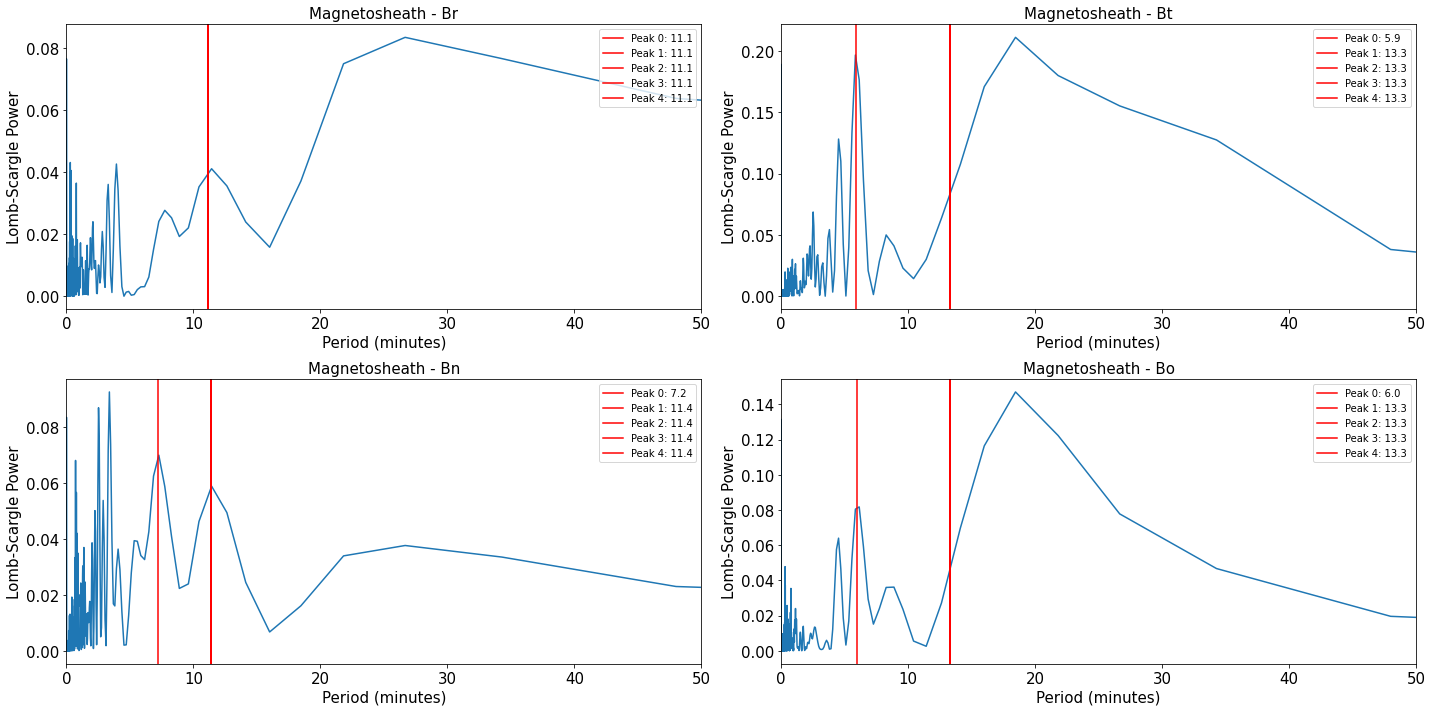

In [11]:
mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize = (20,10))
a = 2
b = 2
c = 1
for i in mag:
    # Peaks
    model = LombScargleFast().fit(t, i)
    model.optimizer.period_range=(tmin,tmax) 
    period = model.find_best_periods()
    print('Periods = {}'.format(period))
    
    frequency, power = LombScargle(t, i, dy=None, fit_mean=False, center_data = True, 
                                   normalization = 'standard').autopower(method = 'fast')


    plt.subplot(a,b,c)
    plt.title('Magnetosheath - ' + i.name, fontsize = 15)
    plt.xlabel('Period (minutes)', fontsize = 15)
    plt.ylabel('Lomb-Scargle Power', fontsize = 15)
    plt.xlim(0,50)
    #plt.ylim(-0.1, 0.2)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.plot(1./frequency, power)
    plt.tight_layout()
    c = c + 1
    
    # add period legend
    for i in range(len(period)):
        plt.axvline(x=period[i], color='red', label='Peak {}: {:.1f}'.format(i, period[i]))
        plt.legend(loc='upper right')

plt.show()

Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 20
 - Computing periods at 15 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [23.66889957 23.66889957 23.66889957 23.66889957 23.66889957]
Maximum power:  0.0917381808186022
Best frequency:  0.037502250135008144
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 20
 - Computing periods at 15 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [18.32051838 18.34853295 18.34853295 18.34853295 18.34853295]
Maximum power:  0.21566807529836202
Best frequency:  0.05416991686167843
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 20
 - Computing periods at 15 steps
Zooming-in on 10 candidate peaks

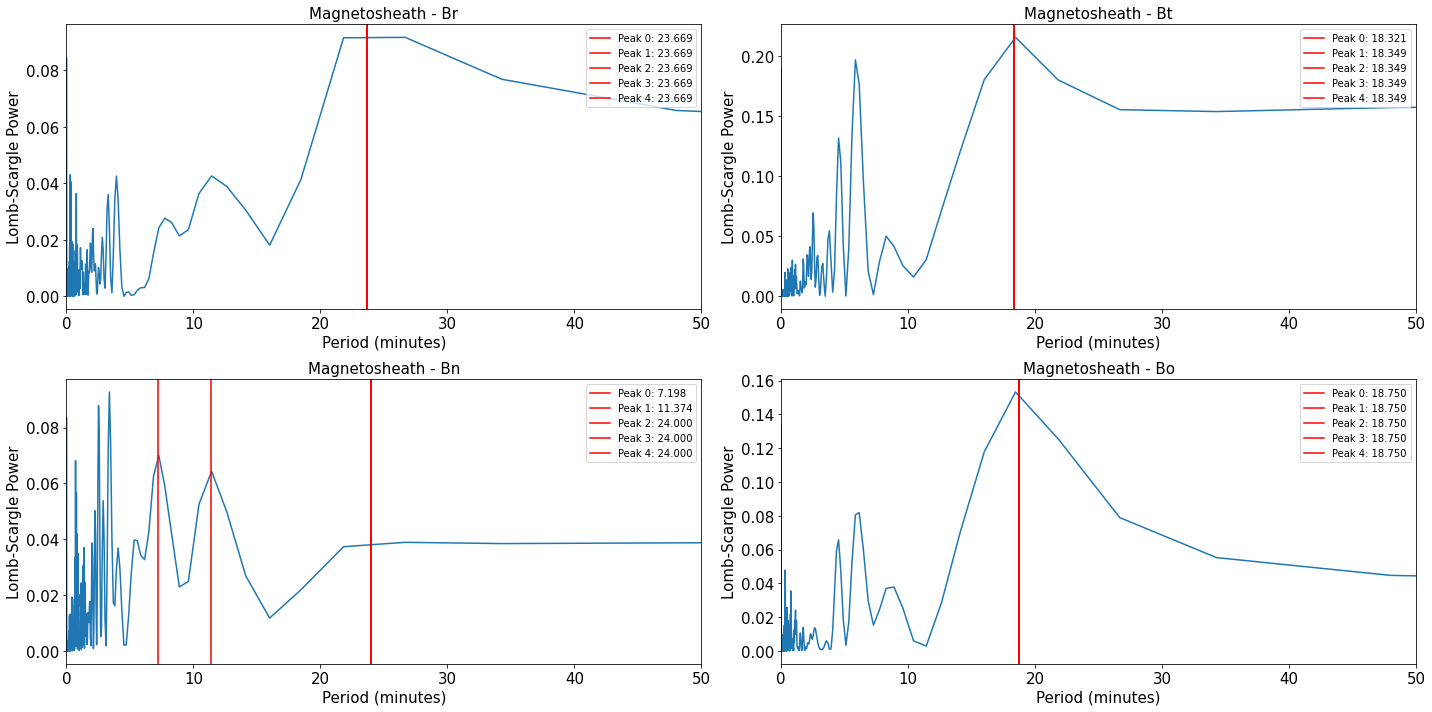

In [15]:
mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize = (20,10))

a = 2
b = 2
c = 1
for i in mag:
    # Peaks
    model = LombScargleFast().fit(t, i)
    model.optimizer.period_range=(20,6) 
    period = model.find_best_periods()
    print('Periods = {}'.format(period))
    
    ls = LombScargle(t, i)
    frequency, power = ls.autopower()
    print('Maximum power: ', power.max())  
    best_frequency = frequency[np.argmax(power)] 
    print('Best frequency: ', best_frequency)

    plt.subplot(a,b,c)
    plt.title('Magnetosheath - ' + i.name, fontsize = 15)
    plt.xlabel('Period (minutes)', fontsize = 15)
    plt.ylabel('Lomb-Scargle Power', fontsize = 15)
    plt.xlim(0,50)
    #plt.ylim(-0.1, 0.2)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.plot(1./frequency, power)
    plt.tight_layout()
    c = c + 1
    
    # add period legend
    for i in range(len(period)):
        plt.axvline(x=period[i], color='red', label='Peak {}: {:.3f}'.format(i, period[i]))
        plt.legend(loc='upper right')

plt.show()